<a href="https://colab.research.google.com/github/sahal-mulki/learning-pytorch/blob/main/Part%201%20-%20Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# My first notebook made while trying to learn PyTorch!

In [18]:
# CREATED IN PART USING THE GEMINI AI FUNCTION IN COLAB

!pip install --upgrade torch torchvision

ERROR: Operation cancelled by user


In [19]:
import torch

z = torch.zeros(2, 3)
print(z)
print("Z has the type:")
print(z.dtype)

ones = torch.ones((2, 3), dtype=torch.int16)

print("Ones has the type:")
print(ones.type)
print(ones)

torch.manual_seed(1234)
r1 = torch.rand((2, 2), dtype=torch.float16)
print('A random tensor:')
print(r1)

r2 = torch.rand((2, 2), dtype=torch.float16)
print('A different random tensor:')
print(r2)

torch.manual_seed(1234)
r3 = torch.rand((2, 2), dtype=torch.float16)
print('Should match r1:')
print(r3)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
Z has the type:
torch.float32
Ones has the type:
<built-in method type of Tensor object at 0x791f9482d800>
tensor([[1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)
A random tensor:
tensor([[0.3979, 0.3530],
        [0.6436, 0.5259]], dtype=torch.float16)
A different random tensor:
tensor([[0.5996, 0.6816],
        [0.3242, 0.9966]], dtype=torch.float16)
Should match r1:
tensor([[0.3979, 0.3530],
        [0.6436, 0.5259]], dtype=torch.float16)


In [21]:
ones = torch.ones((2, 3), dtype=torch.int16)
print(ones)

fours = torch.ones((2, 3), dtype=torch.int16) * 4
print(fours)

fives = ones + fours
print(fives)
print(fives.shape)

tensor([[1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)
tensor([[4, 4, 4],
        [4, 4, 4]], dtype=torch.int16)
tensor([[5, 5, 5],
        [5, 5, 5]], dtype=torch.int16)
torch.Size([2, 3])


pytorch seed changes everytime with new random call??

In [22]:
torch.seed()

17295900731922219800

In [23]:
fours = torch.ones((2, 3), dtype=torch.int16) * 4

In [25]:
r3 = r1 + r2

In [26]:
torch.seed()

85034306175053947

In [38]:
random_between_1_and_1 = torch.rand(2, 2) - 0.5 * 2
print(random_between_1_and_1)

print(torch.abs(random_between_1_and_1))

print(torch.asin(random_between_1_and_1))

print(torch.det(random_between_1_and_1))

print(torch.svd(random_between_1_and_1))

print(torch.std_mean(random_between_1_and_1))

print(torch.max(random_between_1_and_1))

tensor([[-0.4142, -0.7675],
        [-0.7479, -0.6860]])
tensor([[0.4142, 0.7675],
        [0.7479, 0.6860]])
tensor([[-0.4271, -0.8750],
        [-0.8450, -0.7560]])
tensor(-0.2899)
torch.return_types.svd(
U=tensor([[-0.6485, -0.7613],
        [-0.7613,  0.6485]]),
S=tensor([1.3200, 0.2196]),
V=tensor([[ 0.6348, -0.7727],
        [ 0.7727,  0.6348]]))
(tensor(0.1635), tensor(-0.6539))
tensor(-0.4142)


In [42]:
import torch.nn as nn
import torch.nn.functional as F

In [116]:
class MulkiNet(nn.Module):

    def __init__(self):
        super(MulkiNet, self).__init__()
        # 3 input image channel (rgb), 6 output channels, 8*8 square convolution
        # kernel
        self.conv1 = nn.Conv2d(3, 6, 8)
        self.conv2 = nn.Conv2d(6, 16, 4)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 4 * 4, 256)  # 4*4 from image dimension
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [118]:
net = MulkiNet()

print(net)

lenet = Net()

print(lenet)

MulkiNet(
  (conv1): Conv2d(3, 6, kernel_size=(8, 8), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(4, 4), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)
Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [119]:
input = torch.rand(1, 3, 32, 32)   # stand-in for a 32x32 black & white image
print('Image batch shape:')
print(input.shape)

output = net(input)                # we don't call forward() directly
print('\nRaw output:')
print(output)
print(output.shape)

Image batch shape:
torch.Size([1, 3, 32, 32])

Raw output:
tensor([[ 0.0409, -0.1029, -0.0650,  0.0256, -0.0195, -0.1420, -0.0448, -0.0763,
         -0.1250,  0.0721]], grad_fn=<AddmmBackward0>)
torch.Size([1, 10])


In [113]:
%matplotlib inline

In [114]:
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as transforms

# show an image
def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), interpolation='nearest')

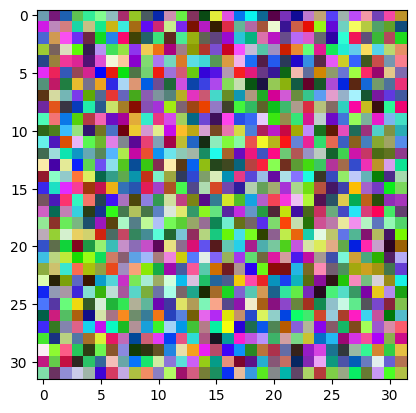

In [120]:
show(torchvision.utils.make_grid(input))

In [103]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))])

In [104]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)

100%|██████████| 170498071/170498071 [00:02<00:00, 59123403.46it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [105]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)


 ship horse horse  bird


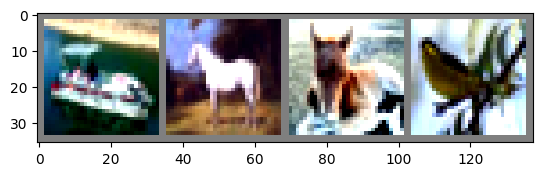

In [107]:
import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [124]:
import torch.optim as optim

In [125]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [127]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = lenet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.304
[1,  4000] loss: 2.304
[1,  6000] loss: 2.305
[1,  8000] loss: 2.306
[1, 10000] loss: 2.305
[1, 12000] loss: 2.305
[2,  2000] loss: 2.305
[2,  4000] loss: 2.305
[2,  6000] loss: 2.304
[2,  8000] loss: 2.305
[2, 10000] loss: 2.304
[2, 12000] loss: 2.306
Finished Training


In [ ]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.333
[1,  4000] loss: 1.337
[1,  6000] loss: 1.361
[1,  8000] loss: 1.336
[1, 10000] loss: 1.332
[1, 12000] loss: 1.322
